In [38]:
# 載入套件
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np #創建數據
plt.rcParams['font.sans-serif'] = ['SimHei']
plt.rcParams['axes.unicode_minus'] = False
data  = pd.read_csv('agecov.csv')
data

,確定病名,發病年份,發病月份,縣市,鄉鎮,性別,是否為境外移入,年齡層,確定病例數
0,嚴重特殊傳染性肺炎,2020,1,台中市,太平區,M,否,30-34,1
1,嚴重特殊傳染性肺炎,2020,1,空值,空值,F,是,50-54,3
2,嚴重特殊傳染性肺炎,2020,1,空值,空值,F,是,55-59,2
3,嚴重特殊傳染性肺炎,2020,1,空值,空值,F,是,70+,2
4,嚴重特殊傳染性肺炎,2020,1,空值,空值,M,是,20-24,1
...,...,...,...,...,...,...,...,...,...
81169,嚴重特殊傳染性肺炎,2022,9,澎湖縣,湖西鄉,M,否,65-69,10
81170,嚴重特殊傳染性肺炎,2022,9,澎湖縣,白沙鄉,M,否,70+,5
81171,嚴重特殊傳染性肺炎,2022,9,澎湖縣,西嶼鄉,M,否,70+,8
81172,嚴重特殊傳染性肺炎,2022,9,澎湖縣,馬公市,M,否,70+,78


# 1.查看前五與後五欄數據

In [39]:
data.head()

,確定病名,發病年份,發病月份,縣市,鄉鎮,性別,是否為境外移入,年齡層,確定病例數
0,嚴重特殊傳染性肺炎,2020,1,台中市,太平區,M,否,30-34,1
1,嚴重特殊傳染性肺炎,2020,1,空值,空值,F,是,50-54,3
2,嚴重特殊傳染性肺炎,2020,1,空值,空值,F,是,55-59,2
3,嚴重特殊傳染性肺炎,2020,1,空值,空值,F,是,70+,2
4,嚴重特殊傳染性肺炎,2020,1,空值,空值,M,是,20-24,1


In [40]:
data.tail()

,確定病名,發病年份,發病月份,縣市,鄉鎮,性別,是否為境外移入,年齡層,確定病例數
81169,嚴重特殊傳染性肺炎,2022,9,澎湖縣,湖西鄉,M,否,65-69,10
81170,嚴重特殊傳染性肺炎,2022,9,澎湖縣,白沙鄉,M,否,70+,5
81171,嚴重特殊傳染性肺炎,2022,9,澎湖縣,西嶼鄉,M,否,70+,8
81172,嚴重特殊傳染性肺炎,2022,9,澎湖縣,馬公市,M,否,70+,78
81173,嚴重特殊傳染性肺炎,2022,9,澎湖縣,湖西鄉,M,否,70+,28


# 3.數據總量

In [41]:
data.shape
print('行數',data.shape[0])
print('欄位數',data.shape[1])

行數 81174
欄位數 9


# 4.查看資料數據總覽

In [42]:
data.info()  #確認欄位名稱與屬性

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 81174 entries, 0 to 81173
Data columns (total 9 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   確定病名     81174 non-null  object
 1   發病年份     81174 non-null  int64 
 2   發病月份     81174 non-null  int64 
 3   縣市       81174 non-null  object
 4   鄉鎮       81174 non-null  object
 5   性別       81174 non-null  object
 6   是否為境外移入  81174 non-null  object
 7   年齡層      81174 non-null  object
 8   確定病例數    81174 non-null  int64 
dtypes: int64(3), object(6)
memory usage: 5.6+ MB


# 5.總體統計信息

In [43]:
data.describe()

,發病年份,發病月份,確定病例數
count,81174.000000,81174.000000,81174.000000
mean,2021.946399,6.564442,75.998768
std,0.236958,1.697601,178.542268
min,2020.000000,1.000000,1.000000
25%,2022.000000,5.000000,5.000000
50%,2022.000000,7.000000,18.000000
75%,2022.000000,8.000000,66.000000
max,2022.000000,12.000000,4979.000000


# 6.檢查是否有重複數值

In [44]:
dup_data = data.duplicated().any()
print('Are there any duplicated value in data?',dup_data) #查看沒有重複數據

Are there any duplicated value in data? False


# 7.檢查是否有空值

In [45]:
data.isnull().sum() #查看數據內沒有空值

確定病名       0
發病年份       0
發病月份       0
縣市         0
鄉鎮         0
性別         0
是否為境外移入    0
年齡層        0
確定病例數      0
dtype: int64

# 8.檢查欄位中的顯示數值

In [46]:
data.columns

Index(['確定病名', '發病年份', '發病月份', '縣市', '鄉鎮', '性別', '是否為境外移入', '年齡層', '確定病例數'], dtype='object')

In [47]:
data['確定病名'].value_counts()

嚴重特殊傳染性肺炎    81174
Name: 確定病名, dtype: int64

In [48]:
data['發病年份'].value_counts()

2022    77043
2021     3911
2020      220
Name: 發病年份, dtype: int64

C:\Users\USER\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='發病年份', ylabel='count'>

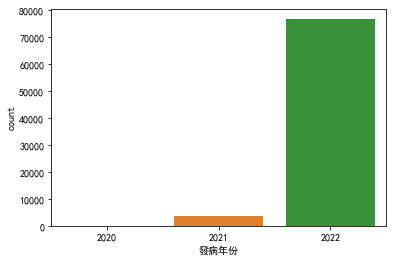

In [122]:
sns.countplot('發病年份',data = data) #2022發病統計數量最多

In [49]:
data['縣市'].value_counts() #空值777

高雄市    8122
新北市    7795
台南市    7455
台中市    6615
屏東縣    6469
彰化縣    5615
雲林縣    4115
台北市    3843
桃園市    3727
苗栗縣    3645
嘉義縣    3496
台東縣    2977
宜蘭縣    2777
花蓮縣    2771
新竹縣    2755
南投縣    2634
基隆市    1905
澎湖縣     978
金門縣     971
空值      777
新竹市     733
連江縣     538
嘉義市     461
Name: 縣市, dtype: int64

In [50]:
data['性別'].value_counts()

M    40270
F    40057
U      706
X      141
Name: 性別, dtype: int64

In [51]:
data['是否為境外移入'].value_counts()

否    80397
是      777
Name: 是否為境外移入, dtype: int64

In [26]:
data['年齡層'].value_counts()  #發現年齡層為亂數

25-29     4687
30-34     4682
20-24     4665
35-39     4664
40-44     4641
50-54     4536
55-59     4531
45-49     4530
70+       4513
60-64     4448
65-69     4396
15-19     4394
5月9日      4335
10月14日    4243
4         3669
3         3626
2         3613
1         3605
0         3396
Name: 年齡層, dtype: int64

In [53]:
data.isin(['空值']).sum()  

確定病名         0
發病年份         0
發病月份         0
縣市         777
鄉鎮         777
性別           0
是否為境外移入      0
年齡層          0
確定病例數        0
dtype: int64

In [54]:
import numpy as np  #將空值取代為Nan為避
data['縣市'] = data['縣市'].replace('空值',np.nan)
data['鄉鎮'] = data['鄉鎮'].replace('空值',np.nan)

In [55]:
data.isin(['空值']).sum() #將空值取代為Nan為避

確定病名       0
發病年份       0
發病月份       0
縣市         0
鄉鎮         0
性別         0
是否為境外移入    0
年齡層        0
確定病例數      0
dtype: int64

In [56]:
data.isnull().sum()

確定病名         0
發病年份         0
發病月份         0
縣市         777
鄉鎮         777
性別           0
是否為境外移入      0
年齡層          0
確定病例數        0
dtype: int64

<AxesSubplot:>

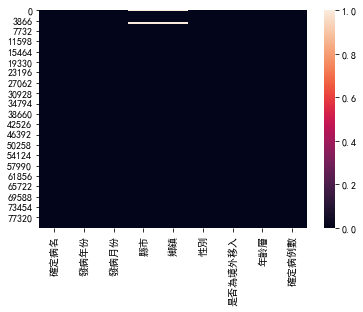

In [57]:
sns.heatmap(data.isnull()) 

# 9.接下來將Nan的數值刪除

In [58]:
per_missing = data.isnull().sum()*100/len(data)
per_missing  #縣市占了1% 性別占了1%的缺失值

確定病名       0.000000
發病年份       0.000000
發病月份       0.000000
縣市         0.957203
鄉鎮         0.957203
性別         0.000000
是否為境外移入    0.000000
年齡層        0.000000
確定病例數      0.000000
dtype: float64

In [59]:
data.dropna(how= 'any',inplace = True)
data.shape  #比對先前一開始的數據，(80397, 9) (81174 rows × 9 columns) 刪除了約7777筆資料

(80397, 9)

In [ ]:
# 81174-80397 刪除了777筆資料

<AxesSubplot:>

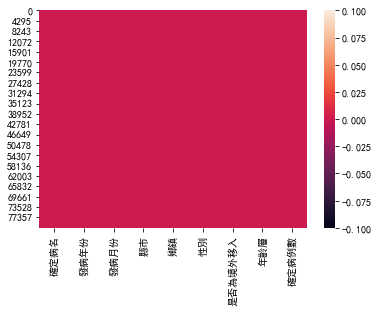

In [61]:
sns.heatmap(data.isnull())  #根據熱圖顯示已經沒有缺失值

In [63]:
map_dict = {'10月14日': '10-14','5月9日': '55-59','2':'20-24','3':'30-34','4':'40-44','0':'0-4','1':'05-09'}
data['年齡層'] = data['年齡層'].replace(map_dict)  #年齡層數值有誤更新為正確數值區間

In [65]:
data['年齡層'].unique()

array(['30-34', '40-44', '20-24', '65-69', '45-49', '50-54', '60-64',
       '55-59', '25-29', '70+', '10-14', '15-19', '35-39', '05-09', '0-4'],
      dtype=object)

# 10.各年齡層確診數量

In [71]:
data1 = data.groupby('年齡層')['確定病例數'].sum()
data1

年齡層
0-4       37508
05-09     57837
10-14    295472
15-19    301422
20-24    518875
25-29    560947
30-34    609629
35-39    561672
40-44    651758
45-49    447242
50-54    371151
55-59    725646
60-64    316312
65-69    257036
70+      423206
Name: 確定病例數, dtype: int64

In [74]:
data1 = data1.reset_index()

<function matplotlib.pyplot.show(close=None, block=None)>

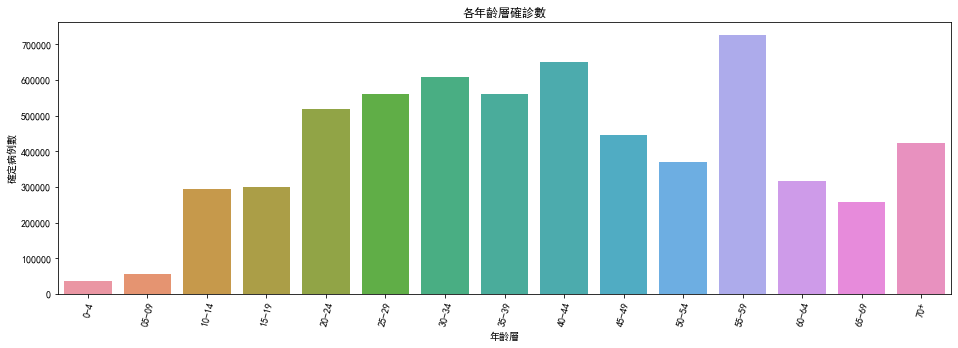

In [80]:
import seaborn as sns
plt.figure(figsize=(16,5))
sns.barplot(x='年齡層',y='確定病例數',data= data1)
plt.xticks(rotation=75)
plt.title('各年齡層確診數')
plt.show

# 11.各縣市確診的人數，並排序大致小

In [93]:
data_city_S = data.groupby('縣市')['確定病例數'].sum().sort_values(ascending = False)
data_city_S

縣市
新北市    1322588
台中市     728526
桃園市     684873
高雄市     663838
台北市     623256
台南市     411337
彰化縣     286825
屏東縣     176941
新竹縣     166503
苗栗縣     134213
新竹市     128348
宜蘭縣     126489
雲林縣     122781
基隆市     120851
花蓮縣     100607
南投縣      99907
嘉義縣      88944
嘉義市      56220
台東縣      54977
澎湖縣      19609
金門縣      15249
連江縣       2831
Name: 確定病例數, dtype: int64

In [94]:
data_city_S  = data_city_S.reset_index()

<function matplotlib.pyplot.show(close=None, block=None)>

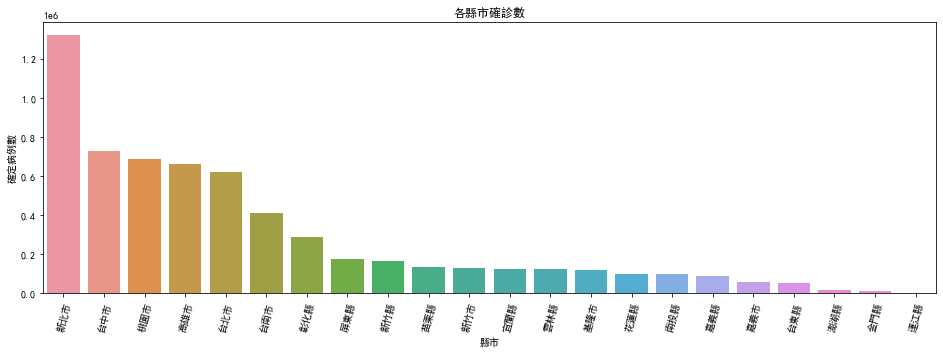

In [95]:
import seaborn as sns  #新北市與新北市的確診數量最多
plt.figure(figsize=(16,5))
sns.barplot(x='縣市',y='確定病例數',data= data_city_S)
plt.xticks(rotation=75)
plt.title('各縣市確診數')
plt.show

# 2022年共有多少人確診?

In [98]:
data.columns

Index(['確定病名', '發病年份', '發病月份', '縣市', '鄉鎮', '性別', '是否為境外移入', '年齡層', '確定病例數'], dtype='object')

In [126]:
data[data['發病年份'] == 2022].groupby('發病年份')['確定病例數'].sum()  f#2022年共有6121101人確診

發病年份
2022    6121101
Name: 確定病例數, dtype: int64

# 新北市哪一個鄉鎮確診數最高

In [112]:
New_taipei = data[data['縣市'] == '新北市'].groupby('鄉鎮')['確定病例數'].sum().sort_values(ascending =False) #板橋為確診數最高
New_taipei

鄉鎮
板橋區    185899
中和區    146238
新莊區    141682
三重區    140393
新店區     96521
土城區     80065
汐止區     78892
永和區     68322
蘆洲區     67750
樹林區     55592
淡水區     55470
林口區     36751
三峽區     33185
五股區     32559
鶯歌區     27767
泰山區     26045
八里區     11942
瑞芳區      9549
深坑區      8699
三芝區      4533
金山區      4403
萬里區      3608
貢寮區      1222
烏來區      1204
石碇區      1107
石門區      1070
雙溪區       919
坪林區       667
平溪區       534
Name: 確定病例數, dtype: int64

# 新北市板橋區累積的確診男性數量

In [136]:
data[(data['鄉鎮'] == '板橋區') &(data['性別'] == 'M')].groupby('鄉鎮')['確定病例數'].sum() #共85105筆

鄉鎮
板橋區    85105
Name: 確定病例數, dtype: int64

# 性別的確診率

In [113]:
data['性別'].value_counts()

M    39867
F    39692
U      705
X      133
Name: 性別, dtype: int64

C:\Users\USER\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='性別', ylabel='count'>

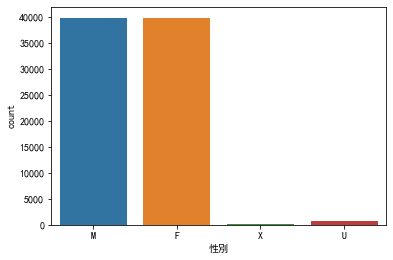

In [116]:
sns.countplot(data['性別'])